In [1]:
# Acquire weather data for various hikes and analyze it

In [2]:
# Import relevant libaries
import json, requests, regex, csv, pandas as pd, matplotlib.pyplot as plt

In [3]:
# Allow users to enter their own hikes and coordinates
coord_dct = {}
while True:
    print("Please enter the name of the hike. You can enter up to 20 hikes.")
    hike_name = input()
    while True:
        print(
            "Please enter the latitude and longitude coordinates of the hike.\nYou can use https://www.google.com/maps to find the coordinates."
        )
        hike_coord = input()
        if regex.search(r"^\d{1,2}.\d{4,},\s*-{,1}\d{1,3}.\d{4,}$", hike_coord):
            break
    coord_dct[hike_name] = (
        hike_coord.split(",")[0] + "," + hike_coord.split(",")[1].replace(" ", "")
    )
    if len(coord_dct) == 20:
        print("You have entered the maximum number of hikes.")
        break
    while True:
        print('Do you want to enter another hike? Please enter "yes" or "no".')
        answer = input()
        if answer in ["yes", "no"]:
            break
    if answer == "no":
        break

Please enter the name of the hike. You can enter up to 20 hikes.
Eagle Rock
Please enter the latitude and longitude coordinates of the hike.
You can use https://www.google.com/maps to find the coordinates.
39.10905126988019, -78.47255602541155
Do you want to enter another hike? Please enter "yes" or "no".
yes
Please enter the name of the hike. You can enter up to 20 hikes.
Old Rag
Please enter the latitude and longitude coordinates of the hike.
You can use https://www.google.com/maps to find the coordinates.
38.553846895083716, -78.3162984106453
Do you want to enter another hike? Please enter "yes" or "no".
yes
Please enter the name of the hike. You can enter up to 20 hikes.
Hightop
Please enter the latitude and longitude coordinates of the hike.
You can use https://www.google.com/maps to find the coordinates.
38.34490428230721, -78.55131510955316
Do you want to enter another hike? Please enter "yes" or "no".
no


In [11]:
# Download the forecast links from the National Weather Service's API using the coord_lst
fc_links = {}
for h in coord_dct:
    try:
        response = requests.get("https://api.weather.gov/points/" + coord_dct[h])
        response.raise_for_status()
        data = json.loads(response.text)
        fc_links[h] = data["properties"]["forecast"]
    except:
        print(f"There was an error with {h}.")

In [12]:
header = [
    "hikeName",
    "time",
    "temperature",
    "probabilityOfPrecipitation",
    "windSpeed",
    "detailedForecast",
]

In [13]:
# Create new csv
with open("weatherforHikes.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    f.close()

In [14]:
# Write 9 periods of each forecast for each hike to csv
for l in fc_links:
    try:
        r2 = requests.get(fc_links[l])
        r2.raise_for_status()
        d2 = json.loads(r2.text)
        i = 0
        while i < 9:
            with open("weatherforHikes.csv", "a", newline="\n") as f:
                writer = csv.writer(f)
                writer.writerow(
                    [
                        l,
                        d2["properties"]["periods"][i]["name"],
                        d2["properties"]["periods"][i]["temperature"],
                        d2["properties"]["periods"][i]["probabilityOfPrecipitation"][
                            "value"
                        ],
                        d2["properties"]["periods"][i]["windSpeed"]
                        + " "
                        + d2["properties"]["periods"][i]["windDirection"],
                        d2["properties"]["periods"][i]["detailedForecast"],
                    ]
                )
                f.close()
            i += 1
    except:
        print(f"There was an error with {l}.")
        print("\n")

In [15]:
# Import csv into dataframe
df = pd.read_csv("weatherforHikes.csv")

In [16]:
df

,hikeName,time,temperature,probabilityOfPrecipitation,windSpeed,detailedForecast
0,Eagle Rock,Tonight,35,20.0,14 mph W,"A slight chance of rain showers before 10pm, t..."
1,Eagle Rock,Friday,45,30.0,13 to 18 mph NW,A chance of rain showers after 2pm. Partly sun...
2,Eagle Rock,Friday Night,31,30.0,13 to 16 mph NW,"A chance of rain showers before 7pm, then a ch..."
3,Eagle Rock,Saturday,46,NaN,15 to 21 mph NW,"Partly sunny, with a high near 46. Northwest w..."
4,Eagle Rock,Saturday Night,32,NaN,8 to 18 mph NW,"Partly cloudy, with a low around 32. Northwest..."
5,Eagle Rock,Sunday,54,NaN,6 to 12 mph N,"Sunny, with a high near 54."
6,Eagle Rock,Sunday Night,36,NaN,5 to 9 mph E,A slight chance of rain after 2am. Partly clou...
7,Eagle Rock,Monday,60,NaN,6 to 13 mph S,"A slight chance of rain. Partly sunny, with a ..."
8,Eagle Rock,Monday Night,45,NaN,7 to 12 mph SW,A slight chance of rain before 8pm. Partly clo...
9,Old Rag,Tonight,34,NaN,14 mph W,"Mostly clear, with a low around 34. West wind ..."


In [17]:
df.fillna(0, inplace=True)

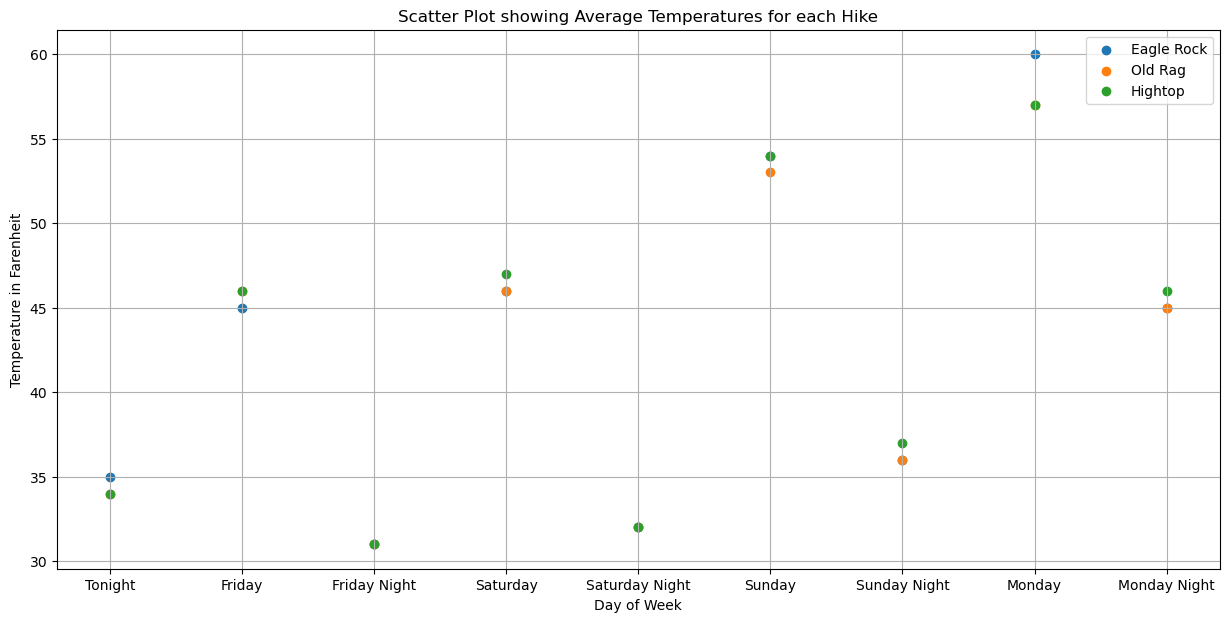

In [18]:
# visualizations
plt.figure(figsize=(15, 7))
for name in df["hikeName"].unique():
    plt.scatter(
        df[df["hikeName"] == name]["time"],
        df[df["hikeName"] == name]["temperature"],
        label=name,
    )
plt.grid()
plt.title("Scatter Plot showing Average Temperatures for each Hike")
plt.xlabel("Day of Week")
plt.ylabel("Temperature in Farenheit")
plt.legend()
plt.show()

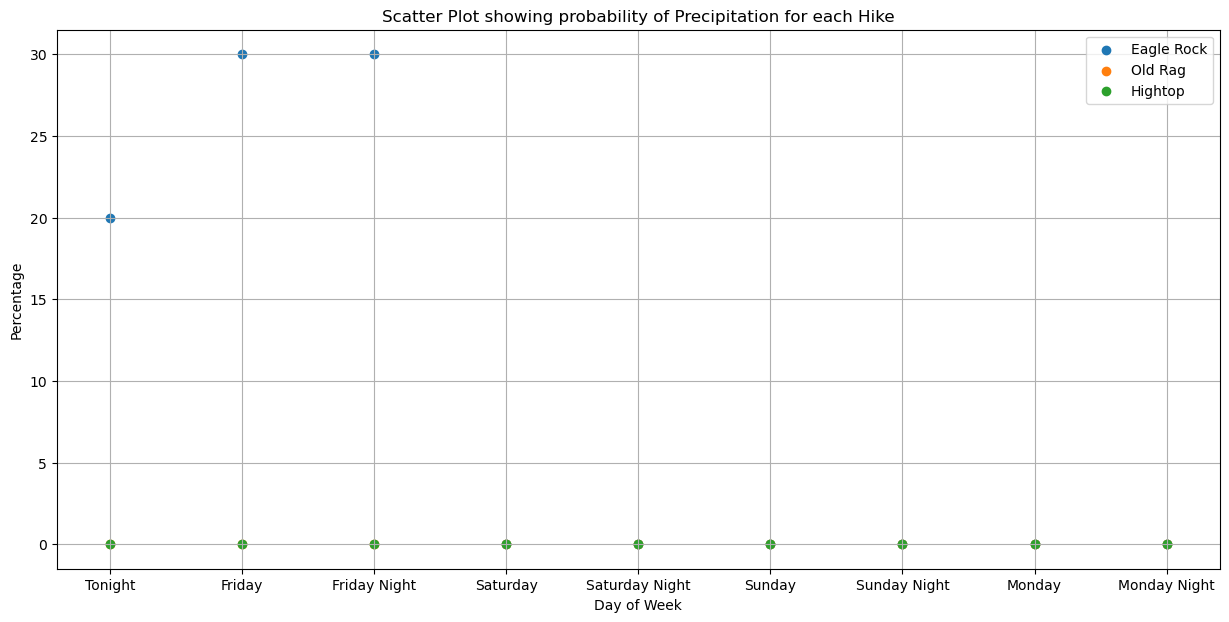

In [19]:
plt.figure(figsize=(15, 7))
for name in df["hikeName"].unique():
    plt.scatter(
        df[df["hikeName"] == name]["time"],
        df[df["hikeName"] == name]["probabilityOfPrecipitation"],
        label=name,
    )
plt.grid()
plt.title("Scatter Plot showing probability of Precipitation for each Hike")
plt.xlabel("Day of Week")
plt.ylabel("Percentage")
plt.legend()
plt.show()